In [1]:
import math  
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.spatial import Voronoi, voronoi_plot_2d

from skimage.graph import route_through_array
from skimage.graph import shortest_path


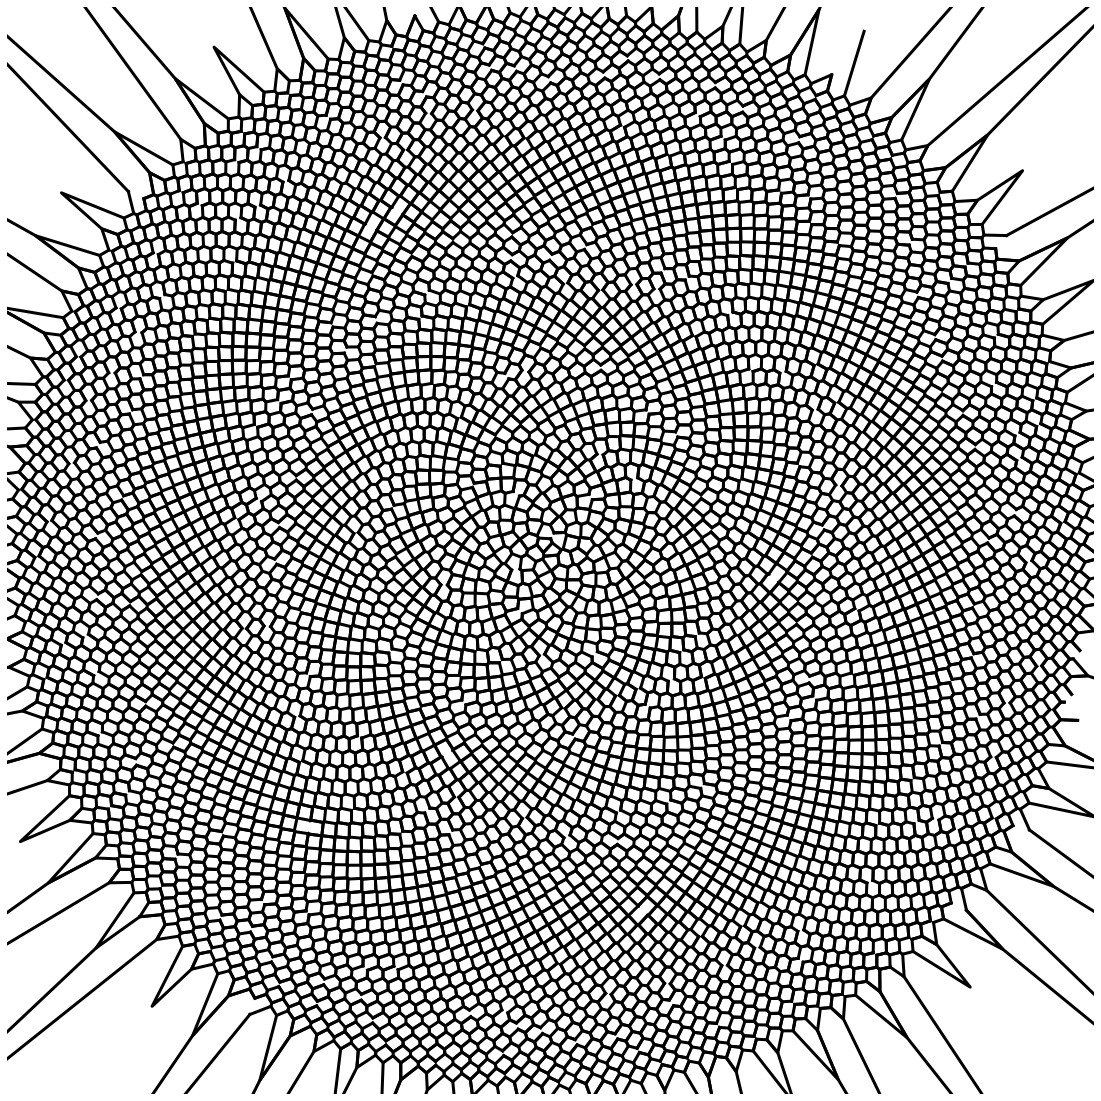

In [2]:
golden_angle = 137.5077640500378546463487396283702776206886952699253696312384958261062333851951
phi = golden_angle * ( math.pi / 180.0 ) 
point_num = 5000

###
### CALCULATE PHYLLOTACTIC PATTERN
###

xlist = []
ylist = []

for n in range (0,point_num): 
    r = math.sqrt(n) 
    theta = n * phi 

    x = r * math.cos(theta)
    y = r * math.sin(theta)

    xlist.append(x)
    ylist.append(y)
    
###
### CALCULATE VORONOI DIAGRAM
### 

coords = np.array(list(zip(xlist,ylist)))
vor = Voronoi(coords)

###
### ISOLATE VORONOI REGIONS
###

x_regions = []
y_regions = []

for i in vor.regions:

    if -1 in i:
        continue

    if not i:
        continue

    xvals = []
    yvals = []

    for j in i:

        xvals.append(vor.vertices[j][0])
        yvals.append(vor.vertices[j][1])

    x_regions.append(xvals)
    y_regions.append(yvals)
    
###
### PLOT
###

plt.figure(figsize=(20,20))

for i in range(len(x_regions)):

    lim = max(np.abs(xlist))
    plt.plot(x_regions[i], y_regions[i], c="k", lw=3)
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis("off")

# WRITE OUT PLOT
plt.savefig("sunflower.tif")



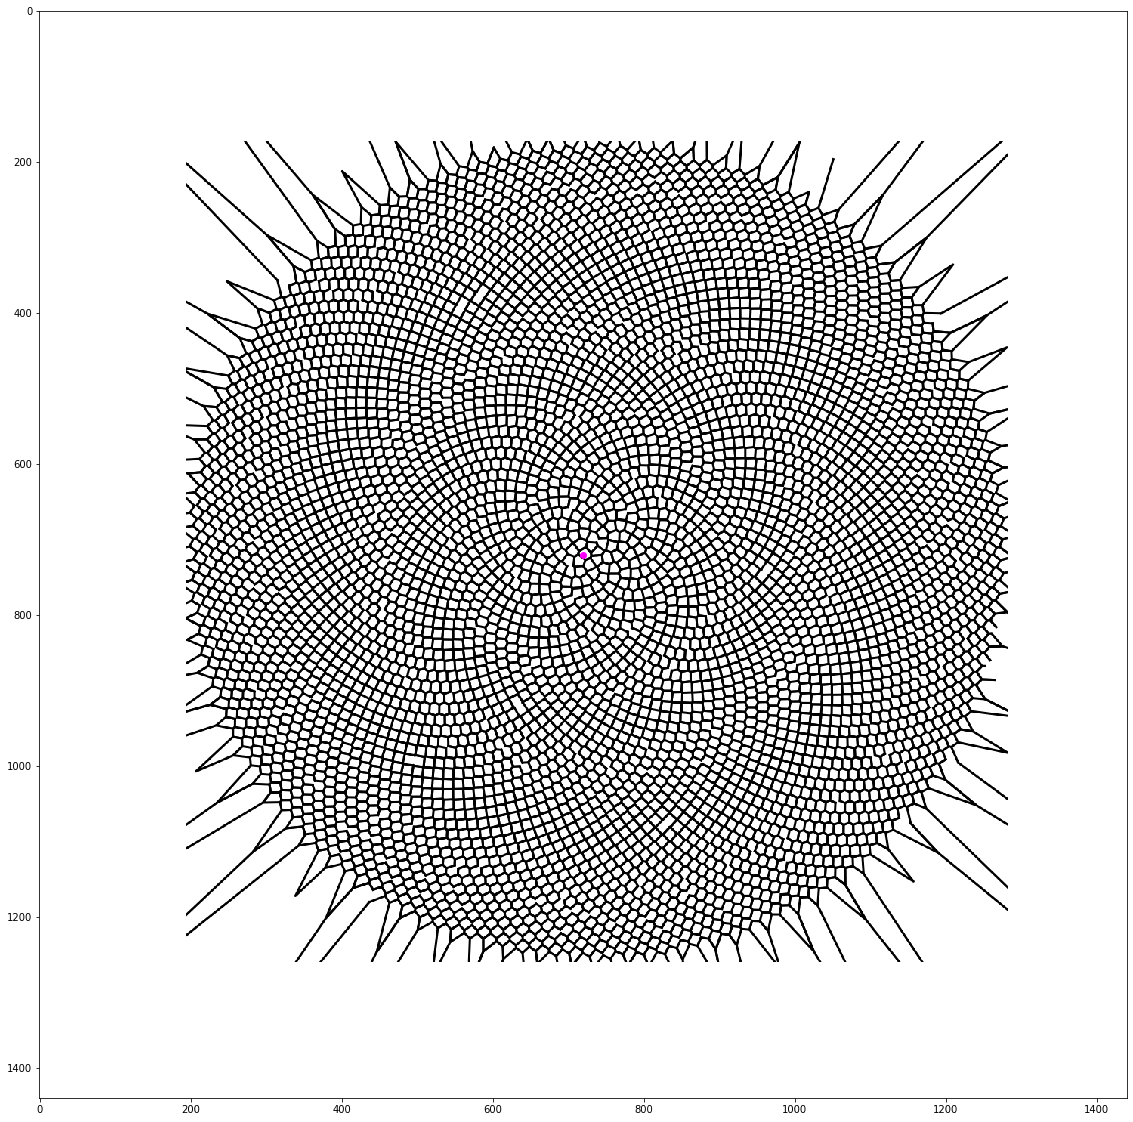

In [3]:
# read in our original image as grayscale
img = cv2.imread("sunflower.tif", cv2.IMREAD_GRAYSCALE)

# define the end point/(center) to calculate paths

xend = img.shape[0]/2
yend = img.shape[1]/2

# plot end/center point to check

plt.figure(figsize=(20,20))
plt.imshow(img, cmap="gray")
plt.scatter(xend,yend, c="magenta") # end

end = np.array([int(yend),int(xend)])

In [4]:
# calculate points in phyllotactic angles around the circumfrence

xlist = []
ylist = []
point_num = 200 # SET NUMBER OF POINTS TO CALCULATE
r = img.shape[0]/3

for n in range (0,point_num): 

    theta = n * phi 

    x = r * math.cos(theta)
    y = r * math.sin(theta) 

    xlist.append(x+img.shape[0]/2)
    ylist.append(y+img.shape[0]/2)
    
# for each point on the circumfrence, calculate weighted geodesic path to the center

xval_paths = []
yval_paths = []
    
for i in range(len(ylist)):
        
        
    starty = int(ylist[i])
    startx = int(xlist[i])
            
    start = np.array([ starty, startx ])

    path, cost = route_through_array(img, start, end)
    ypath, xpath = zip(*path)
    xval_paths.append(xpath)
    yval_paths.append(ypath)


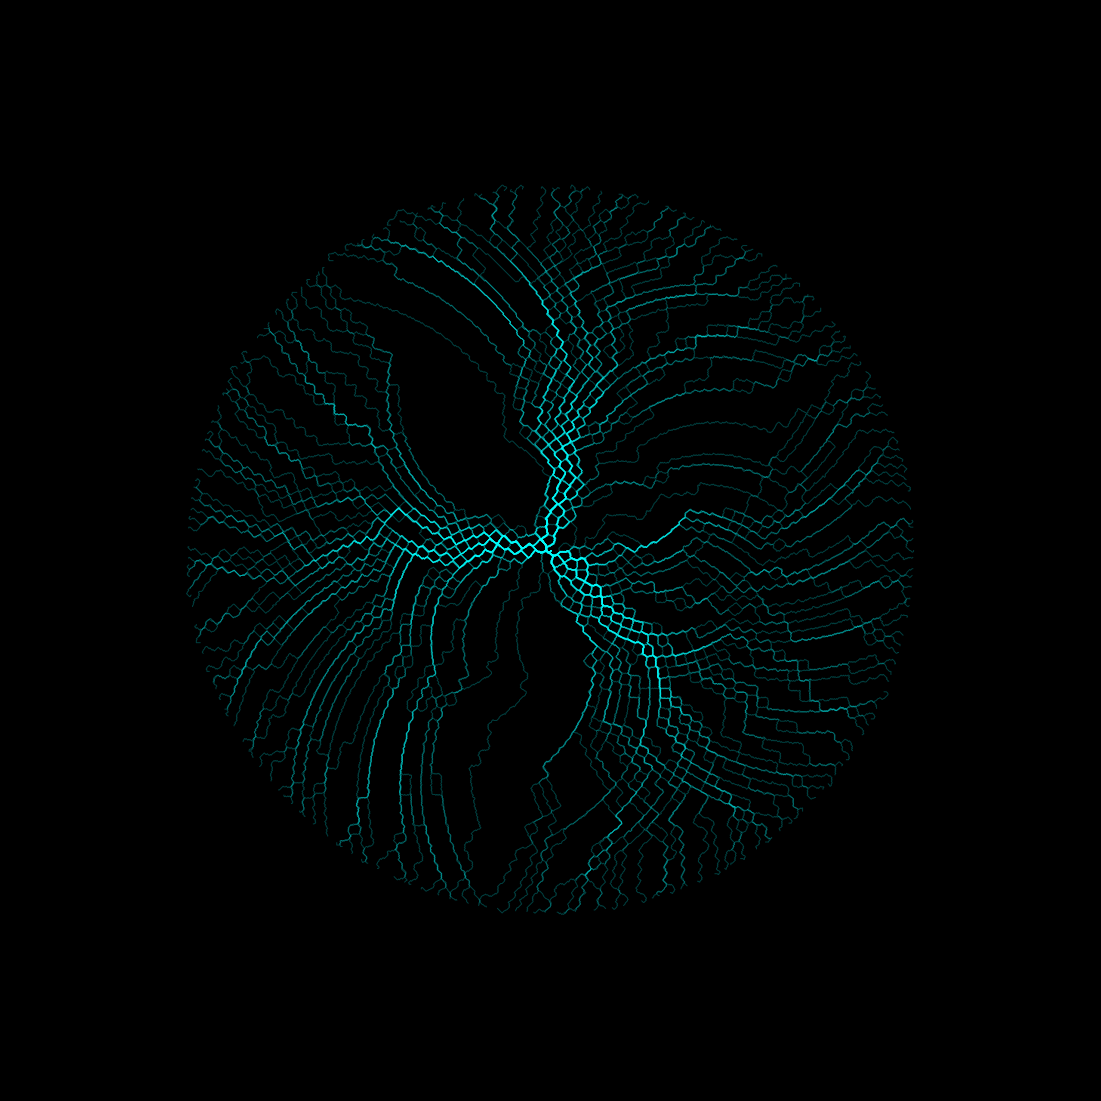

In [14]:
# plot and save each path one at a time

fc = "black"
pc = "cyan"

plt.figure(figsize=(20,20),facecolor=fc)
plt.imshow(-img, cmap="gray", alpha=0)

for p in range(len(xval_paths)):
    
    plt.plot(xval_paths[p],yval_paths[p],c=pc,lw=1,alpha=0.25)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis("off")

    
    plt.savefig('./temp/num' + str(p), facecolor=fc, edgecolor='none', bbox_inches='tight',pad_inches = 0)
    

